In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_theme(style="whitegrid")

In [4]:
burnout_train = pd.read_csv('./train.csv')
print(burnout_train.shape)

(22750, 9)


In [5]:
burnout_train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [6]:
burnout_train.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [7]:
# Drop NA values
burnout_train = burnout_train.dropna()
burnout_train.isna().sum()


Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [8]:
burnout_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,18590.0,2.179398,1.133148,0.0,1.00,2.00,3.00,5.0
Resource Allocation,18590.0,4.486552,2.044848,1.0,3.00,4.00,6.00,10.0
Mental Fatigue Score,18590.0,5.732173,1.920547,0.0,4.60,5.90,7.10,10.0
Burn Rate,18590.0,0.452444,0.197848,0.0,0.32,0.45,0.59,1.0


In [9]:
burnout_train_2 = burnout_train.copy()

In [10]:
burnout_train_2.nunique()

Employee ID             18590
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [11]:
burnout_train_2['Gender']              = burnout_train_2['Gender'].map({'Female': 1, 'Male': 0})
burnout_train_2['Company Type']        = burnout_train_2['Company Type'].map({'Service': 1, 'Product': 0})
burnout_train_2['WFH Setup Available'] = burnout_train_2['WFH Setup Available'].map({'Yes': 1, 'No': 0})

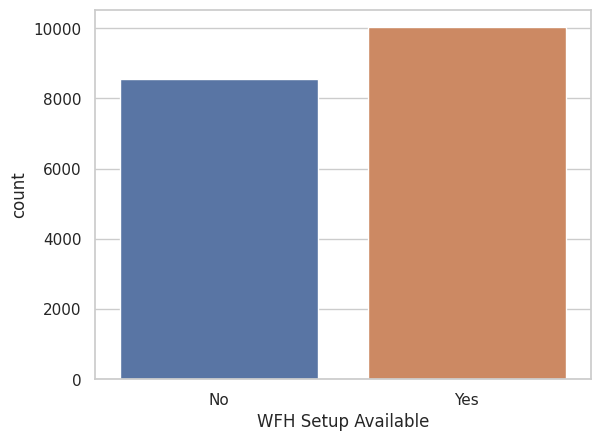

In [12]:
sns.countplot(data=burnout_train, x='WFH Setup Available');

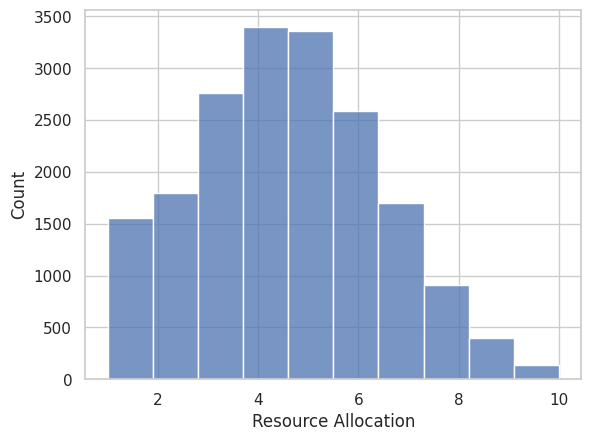

In [13]:
sns.histplot(data=burnout_train, x='Resource Allocation', bins=10);

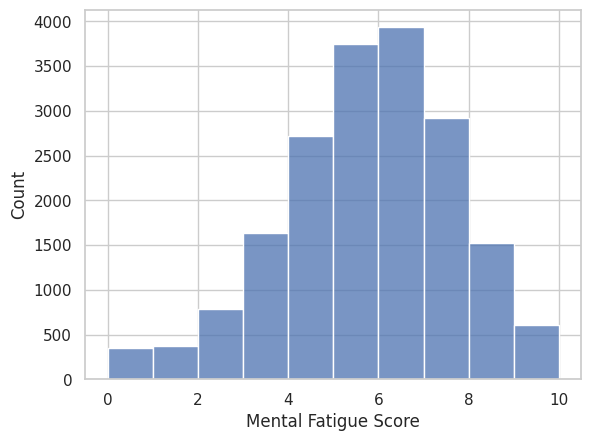

In [14]:
sns.histplot(data=burnout_train, x='Mental Fatigue Score', bins=10);

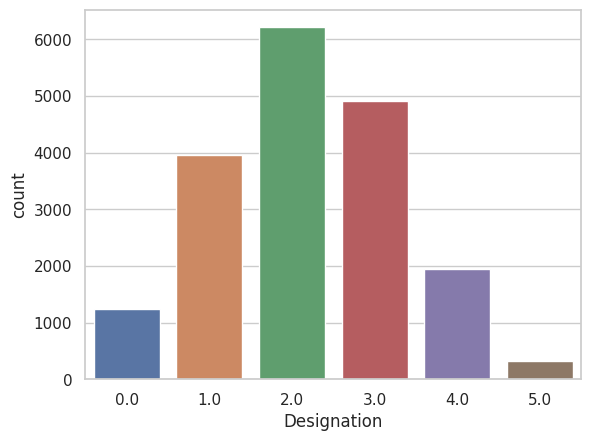

In [15]:
sns.countplot(data=burnout_train, x='Designation');

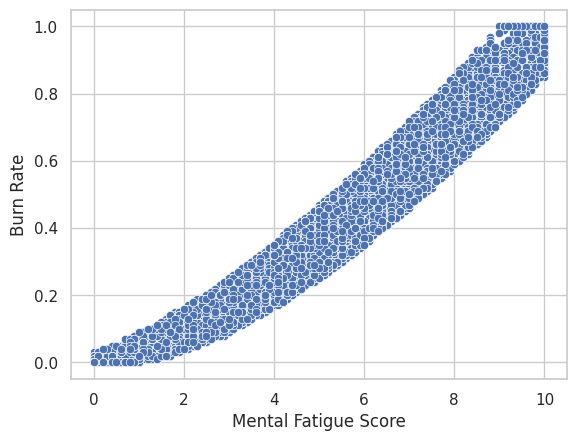

In [16]:
sns.scatterplot(data=burnout_train_2, x='Mental Fatigue Score', y='Burn Rate');

<ipython-input-17-ceb15f772a14>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = burnout_train_2.corr()


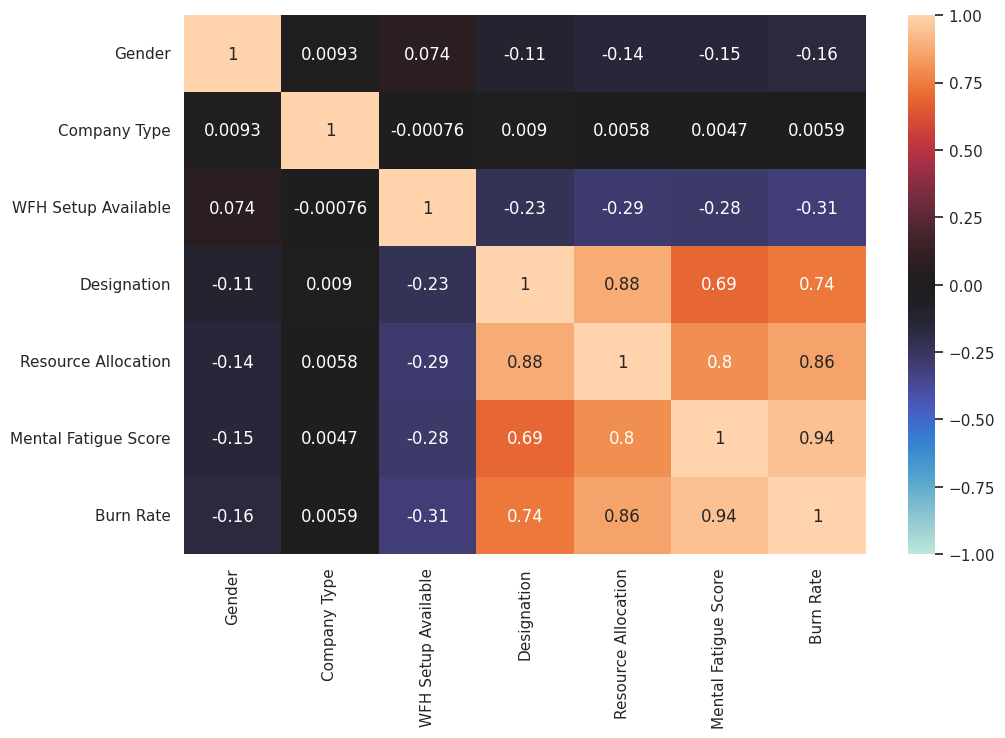

In [17]:
plt.figure(figsize=(11,7))
corr = burnout_train_2.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

In [18]:
scaler = StandardScaler()

In [19]:
drop_list = ['Employee ID', 'Date of Joining', 'Company Type']

burnout_train_3 = burnout_train_2.drop(drop_list, axis=1)

In [20]:
X = np.array(burnout_train_3.drop('Burn Rate', axis=1))
y = np.array(burnout_train_3['Burn Rate'])

In [21]:
X = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)

In [23]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (14872, 5)
Test shape: (3718, 5)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Avaliando o modelo
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', metrics.mean_squared_error(y_test, y_pred))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 0.04565426645543035
RMSE: 0.003115706213502447
R2: 0.9203715105461742
